In [1]:
#import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_US = df[df['job_country'] == 'United States'].dropna(subset='salary_year_avg')
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
df_US_Salary = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_US_Salary.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

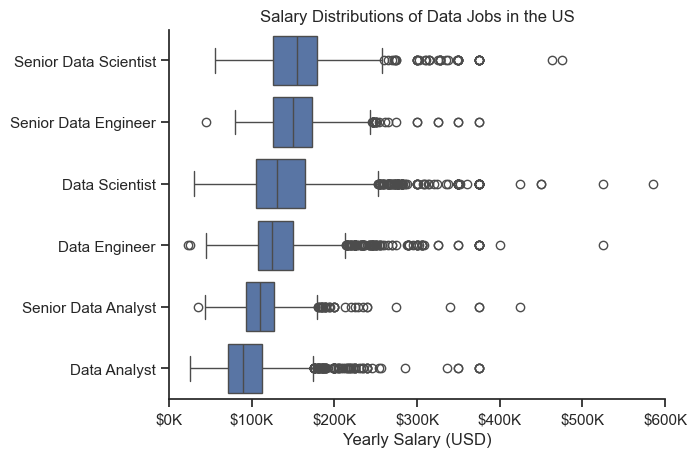

In [31]:
sns.boxplot(data=df_US_Salary, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [32]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].dropna(subset = 'salary_year_avg')
df_DA_US = df_DA_US.explode('job_skills')
df_paid = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_paid = df_paid.head(10)
df_paid

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [34]:
df_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_skills = df_skills.head(10).sort_values(by='median', ascending=False)
df_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


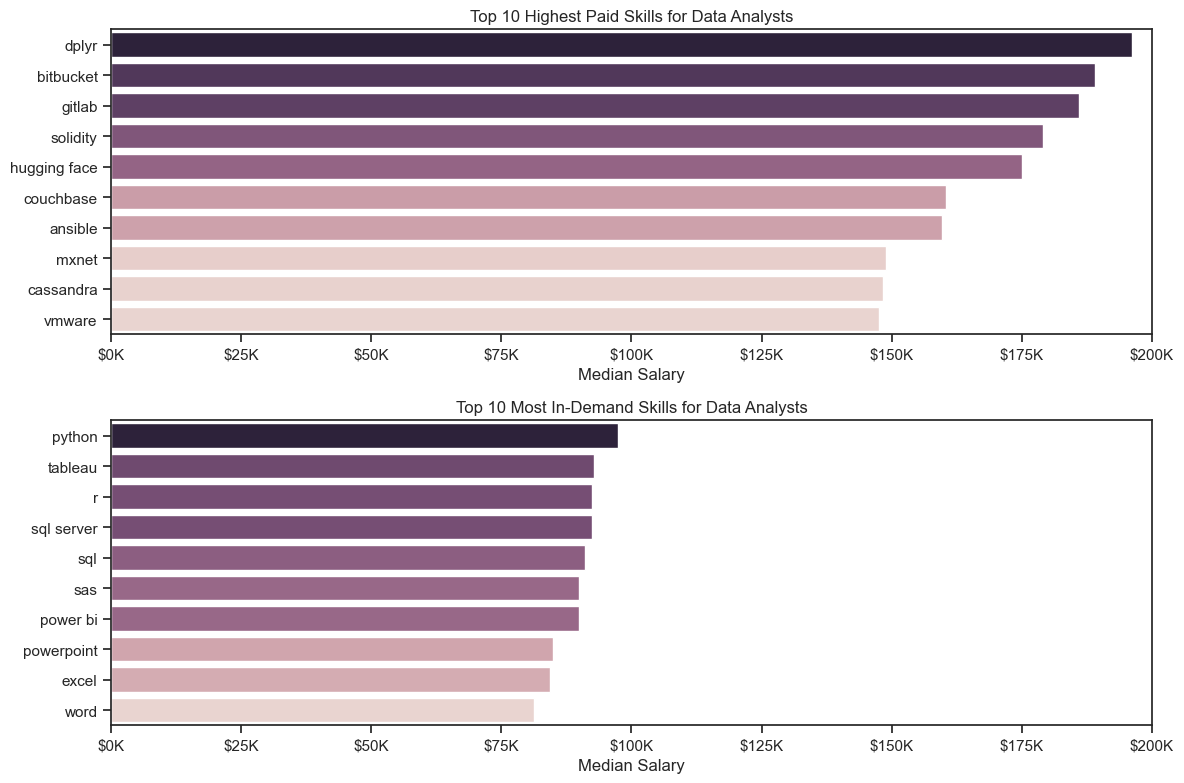

In [38]:
fig, ax = plt.subplots(2,1, figsize = (12,8))

sns.barplot(x = 'median', y = df_paid.index, data = df_paid, hue = 'median', ax = ax[0],legend = False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].set_xlim(0, 200000)


sns.barplot(x = 'median', y= df_skills.index, data = df_skills, hue = 'median', ax=ax[1],legend=False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(0, 200000)

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()